Status: Optimal
x = 1.0
y = 1.0
Objective = 5.0


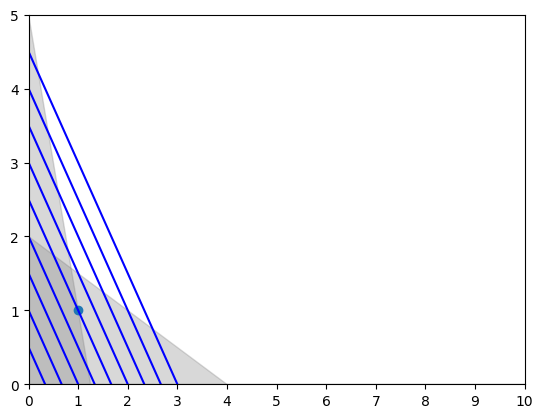

In [76]:
import pulp
import matplotlib.pyplot as plt
import numpy as np

# 문제 생성: 최대화 문제
problem = pulp.LpProblem("Maximize_Z", pulp.LpMaximize)

# 변수 정의: x와 y는 0 이상의 정수
x = pulp.LpVariable("x", lowBound=0, cat='Integer')
y = pulp.LpVariable("y", lowBound=0, cat='Integer')

# 목적 함수 정의
objective = 3 * x + 2 * y
problem += objective, "Objective Function"

# 제약 조건 정의
constraint1 = x + 2 * y <= 4
constraint2 = 4 * x + y <= 5
problem += constraint1, "Constraint 1"
problem += constraint2, "Constraint 2"

# 문제 풀기
problem.solve()

# 결과 출력
print(f"Status: {pulp.LpStatus[problem.status]}")
print(f"x = {pulp.value(x)}")
print(f"y = {pulp.value(y)}")
print(f"Objective = {pulp.value(problem.objective)}")

x = np.linspace(0, 10, 400)
y1 = (4 - x) / 2
plt.fill_between(x, 0, y1, color='gray', alpha=0.3)
y2 = 5 - 4 * x
plt.fill_between(x, 0, y2, color='gray', alpha=0.3)
for k in range(0, 10):
    yo = k/2 - 3/2*x
    plt.plot(x, yo, color='blue')
plt.scatter(1,1)
plt.xlim(0, 10)
plt.ylim(0, 5)
plt.xticks(range(0, 11, 1))
plt.yticks(range(0, 6, 1))
plt.show()

Status: 0
Optimal value: 5.0
Solution: [1. 1.]


<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


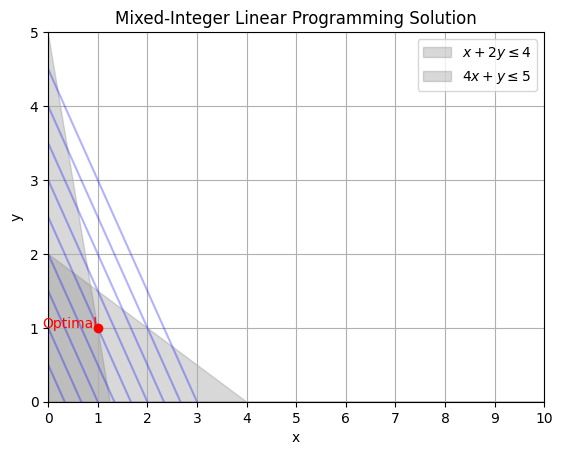

In [75]:
import numpy as np
from scipy.optimize import milp, LinearConstraint

# 목적 함수 계수 (최대화 문제를 위해 부호를 반대로 설정)
c = -np.array([3, 2])

# 제약 조건 계수
A = np.array([[1, 2], [4, 1]])
b_u = np.array([4, 5])
b_l = np.full_like(b_u, -np.inf)

# 제약 조건 정의
constraints = LinearConstraint(A, b_l, b_u)

# 정수 변수 설정
integrality = np.ones_like(c)

# 문제 해결
result = milp(c=c, constraints=constraints, integrality=integrality)

# 결과 출력
print("Status:", result.status)
print("Optimal value:", -result.fun)
print("Solution:", result.x)

# 시각화
x_vals = np.linspace(0, 10, 400)
y1 = (4 - x_vals) / 2
y2 = 5 - 4 * x_vals
plt.fill_between(x_vals, 0, y1, color='gray', alpha=0.3, label=r'$x + 2y \leq 4$')
plt.fill_between(x_vals, 0, y2, color='gray', alpha=0.3, label=r'$4x + y \leq 5$')

# 목적 함수 라인
for k in range(0, 10):
    y_obj = k / 2 - (3 / 2) * x_vals
    plt.plot(x_vals, y_obj, color='blue', alpha=0.3)

# 최적해 점
plt.scatter(result.x[0], result.x[1], color='red', zorder=5)
plt.text(result.x[0], result.x[1], 'Optimal', horizontalalignment='right', color='red')

# 그래프 설정
plt.xlim(0, 10)
plt.ylim(0, 5)
plt.xticks(range(0, 11, 1))
plt.yticks(range(0, 6, 1))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Mixed-Integer Linear Programming Solution')
plt.grid(True)
plt.show()


Status: Optimal
x = 1.0
y = 1.0
Objective = 5.0


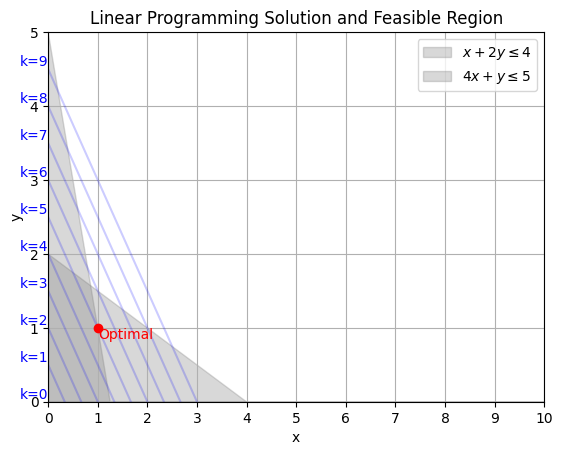

In [38]:
import pulp
import matplotlib.pyplot as plt
import numpy as np

# 문제 생성: 최대화 문제
problem = pulp.LpProblem("Maximize_Z", pulp.LpMaximize)

# 변수 정의: x와 y는 0 이상의 정수
x = pulp.LpVariable("x", lowBound=0, cat='Integer')
y = pulp.LpVariable("y", lowBound=0, cat='Integer')

# 목적 함수 정의
objective = 3 * x + 2 * y
problem += objective, "Objective Function"

# 제약 조건 정의
constraint1 = x + 2 * y <= 4
constraint2 = 4 * x + y <= 5
problem += constraint1, "Constraint 1"
problem += constraint2, "Constraint 2"

# 문제 풀기
problem.solve()

# 결과 출력
print(f"Status: {pulp.LpStatus[problem.status]}")
print(f"x = {pulp.value(x)}")
print(f"y = {pulp.value(y)}")
print(f"Objective = {pulp.value(problem.objective)}")

# 그래프 그리기
x_vals = np.linspace(0, 10, 400)
y1 = (4 - x_vals) / 2
plt.fill_between(x_vals, 0, y1, color='gray', alpha=0.3, label=r'$x + 2y \leq 4$')
y2 = (5 - 4 * x_vals)
plt.fill_between(x_vals, 0, y2, color='gray', alpha=0.3, label=r'$4x + y \leq 5$')

# Objective function lines and labels
for k in range(0, 10):
    y_obj = k / 2 - (3 / 2) * x_vals
    plt.plot(x_vals, y_obj, color='blue', alpha=0.2)
    plt.text(0, k / 2, f'k={k}', color='blue', verticalalignment='bottom', horizontalalignment='right')

# Optimal solution point
plt.scatter(pulp.value(x), pulp.value(y), color='red', zorder=5)
plt.text(pulp.value(x), pulp.value(y), 'Optimal', verticalalignment='top', horizontalalignment='left', color='red')

# Graph settings
plt.xlim(0, 10)
plt.ylim(0, 5)
plt.xticks(range(0, 11, 1))
plt.yticks(range(0, 6, 1))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Linear Programming Solution and Feasible Region')
plt.grid(True)
plt.show()


In [94]:
import pulp
import numpy as np

# 문제 생성: 최대화 문제
problem = pulp.LpProblem("Maximize_Z", pulp.LpMaximize)

# 변수 정의: 100개의 0 이상의 정수 변수
num_vars = 10000
variables = [pulp.LpVariable(f'x{i}', lowBound=0, cat='Integer') for i in range(num_vars)]
print(variables[0])

# 랜덤한 목적 함수 계수 생성
np.random.seed(0)  # 재현성을 위해 시드 설정
objective_coeffs = np.random.randint(1, 10, size=num_vars)
print(variables)
print(objective_coeffs)
objective = pulp.lpSum([objective_coeffs[i] * variables[i] for i in range(num_vars)])
print([objective_coeffs[i] * variables[i] for i in range(num_vars)])
print(type(objective_coeffs[0] * variables[0]))
problem += objective, "Objective Function"

# 랜덤한 제약 조건 생성
num_constraints = 20
constraint_coeffs = np.random.randint(1, 10, size=(num_constraints, num_vars))
print(constraint_coeffs)
constraint_bounds = np.random.randint(10, 100, size=num_constraints)
print(constraint_bounds)

for j in range(num_constraints):
    constraint = pulp.lpSum([constraint_coeffs[j][i] * variables[i] for i in range(num_vars)])
    problem += (constraint <= constraint_bounds[j]), f"Constraint_{j+1}"

# 문제 풀기
problem.solve()

# 결과 출력
print(f"Status: {pulp.LpStatus[problem.status]}")
# for i in range(num_vars):
#     print(f"x{i} = {pulp.value(variables[i])}")
solution = np.array([pulp.value(variables[i]) for i in range(num_vars)])
print(solution)
print('the number of nonzero elements :',(solution!=0).sum())

print(f"Objective = {pulp.value(problem.objective)}")


x0
[x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17, x18, x19, x20, x21, x22, x23, x24, x25, x26, x27, x28, x29, x30, x31, x32, x33, x34, x35, x36, x37, x38, x39, x40, x41, x42, x43, x44, x45, x46, x47, x48, x49, x50, x51, x52, x53, x54, x55, x56, x57, x58, x59, x60, x61, x62, x63, x64, x65, x66, x67, x68, x69, x70, x71, x72, x73, x74, x75, x76, x77, x78, x79, x80, x81, x82, x83, x84, x85, x86, x87, x88, x89, x90, x91, x92, x93, x94, x95, x96, x97, x98, x99, x100, x101, x102, x103, x104, x105, x106, x107, x108, x109, x110, x111, x112, x113, x114, x115, x116, x117, x118, x119, x120, x121, x122, x123, x124, x125, x126, x127, x128, x129, x130, x131, x132, x133, x134, x135, x136, x137, x138, x139, x140, x141, x142, x143, x144, x145, x146, x147, x148, x149, x150, x151, x152, x153, x154, x155, x156, x157, x158, x159, x160, x161, x162, x163, x164, x165, x166, x167, x168, x169, x170, x171, x172, x173, x174, x175, x176, x177, x178, x179, x180, x181, x182, x183, x1

In [82]:
x = np.arange(6, dtype=int)
np.full_like(x, 1)


array([1, 1, 1, 1, 1, 1])

In [90]:
import numpy as np
c = -np.array([0, 1])

A = np.array([[-1, 1], [3, 2], [2, 3]])
b_u = np.array([1, 12, 12])
b_l = np.full_like(b_u, -np.inf)
print(A)
print(b_u)
print(b_l)

from scipy.optimize import LinearConstraint
constraints = LinearConstraint(A, b_l, b_u)
print(constraints)

integrality = np.ones_like(c)
print(c)

from scipy.optimize import milp
res = milp(c=c, constraints=constraints, integrality=integrality)
print(res.x)

res = milp(c=c, constraints=constraints)  # OR:
# from scipy.optimize import linprog; res = linprog(c, A, b_u)
print(res.x)

[[-1  1]
 [ 3  2]
 [ 2  3]]
[ 1 12 12]
[-2147483648 -2147483648 -2147483648]
[ 0 -1]
[1. 2.]
[1.8 2.8]


<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


In [93]:
import numpy as np
from scipy.optimize import milp, LinearConstraint, Bounds

# 변수 정의: 100개의 0 이상의 정수 변수
num_vars = 10000

# 랜덤한 목적 함수 계수 생성
np.random.seed(0)  # 재현성을 위해 시드 설정
objective_coeffs = np.random.randint(1, 10, size=num_vars)

# 랜덤한 제약 조건 생성
num_constraints = 20
constraint_coeffs = np.random.randint(1, 10, size=(num_constraints, num_vars))
constraint_bounds = np.random.randint(10, 100, size=num_constraints)

# LinearConstraint 생성
A = constraint_coeffs
b_u = constraint_bounds
b_l = -np.inf * np.ones_like(b_u)
constraints = LinearConstraint(A, b_l, b_u)

# 정수성 제약 설정
integrality = np.ones(num_vars)

# 경계 조건 설정 (모든 변수는 0 이상)
bounds = Bounds(0, np.inf)

# 문제 해결
res = milp(c=-objective_coeffs, constraints=constraints, integrality=integrality, bounds=bounds)

# 결과 출력
print(f"Status: {res.success}")
solution = res.x
print(solution)
print('The number of nonzero elements:', (solution != 0).sum())
print(f"Objective = {-res.fun}")


Status: True
[0. 0. 0. ... 0. 0. 0.]
The number of nonzero elements: 10
Objective = 108.00000000002412
